In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/python-data-science-workshop/master/drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [4]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


How many missing values?

In [5]:
df.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [6]:
# show the country where the continent is NaN

df[ df.continent.isnull()][['country', 'continent']]

,country,continent
5,Antigua & Barbuda,NaN
11,Bahamas,NaN
14,Barbados,NaN
17,Belize,NaN
32,Canada,NaN
41,Costa Rica,NaN
43,Cuba,NaN
50,Dominica,NaN
51,Dominican Republic,NaN
54,El Salvador,NaN


In [24]:
# drop the NaN rows

df = df.dropna()
df.shape[0]

170

In [8]:
# replace NaN 

df.fillna(value='---').head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,---
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [25]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,total_serving
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,100.847059,69.529412,52.823529,4.544118,223.200000
std,102.754951,81.058907,83.762227,3.894511,214.248062
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,1.000000,39.000000
50%,59.000000,36.500000,8.000000,3.950000,132.000000
75%,168.500000,114.000000,73.750000,7.200000,389.500000
max,376.000000,373.000000,370.000000,14.400000,695.000000


In [10]:
df.continent.shape

(193,)

In [11]:
# count of unique values

df.continent.value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [12]:
# create a new column = sum of 3 existing columns

df['total_serving'] = df.beer_servings + df.spirit_servings + df.wine_servings
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_serving
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [13]:
# for each continent, calculate mean beer serving

df.groupby('continent').beer_servings.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [14]:
# number of entries for each continent

df.groupby('continent').continent.count()

continent
AF    53
AS    44
EU    45
OC    16
SA    12
Name: continent, dtype: int64

# Simple plotting

In [15]:
%matplotlib inline

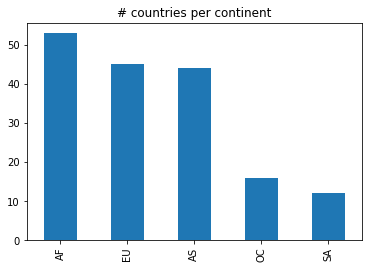

In [16]:
# number of countries per continent

df.continent.value_counts().plot(kind='bar', title='# countries per continent')

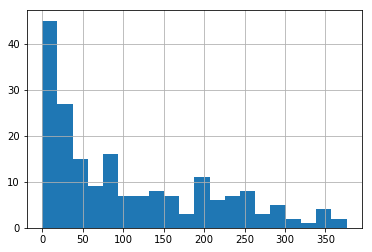

In [17]:
df.beer_servings.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b318518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b5a41d0>]], dtype=object)

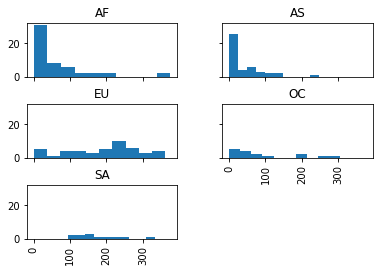

In [18]:
df.beer_servings.hist(by=df.continent, sharex=True, sharey=True)

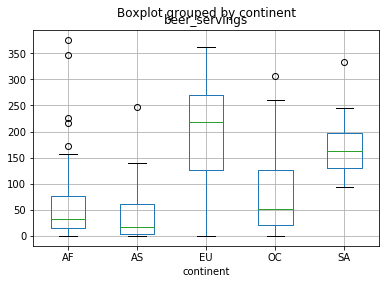

In [19]:
df.boxplot(column='beer_servings', by='continent')

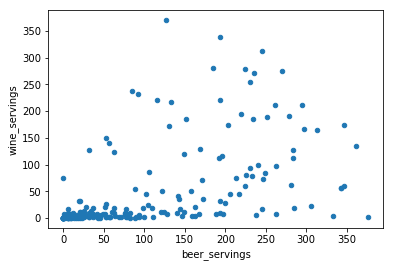

In [20]:
# beer servings vs wine serving

df.plot(x='beer_servings', y='wine_servings', kind='scatter')

In [21]:
colors = np.where(df.continent=='EU', 'r', 'b')
colors


array(['b', 'r', 'b', 'r', 'b', 'b', 'b', 'r', 'b', 'r', 'r', 'b', 'b',
       'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'r',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'r', 'b', 'r', 'r', 'b', 'b', 'r', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'r', 'r', 'b', 'b', 'r',
       'r', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b',
       'b', 'b', 'b', 'r', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'r', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b',
       'b', 'r', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'r', 'b', 'b', 'b',
       'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'b', 'b',
       'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'r',
       'r', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b',
       'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r

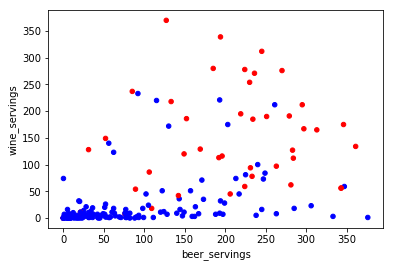

In [22]:
# EU is in red

df.plot(x='beer_servings', y='wine_servings', kind='scatter', c=colors)